<a href="https://colab.research.google.com/github/ShiroiYuutsu/AI-Study/blob/main/seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS E GERANDO BD SIMPLES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

ages = np.random.randint(low = 15, high = 70, size = 40)

ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

SEPARANDO EM LABELS

In [ ]:
labels = []
for i in ages:
  if i < 30:
    labels.append(0)
  else:
    labels.append(1)


#troca aleatória de alguns seguros

for i in range(0, 3):
  r = np.random.randint(0, len(labels) -1)
  if labels[r] == 0:
    labels[r] = 1
  else:
    labels[r] = 0



PLOTANDO OS DADOS APENAS PARA VISUALIZAR COM ESTÃO ATUALMENTE

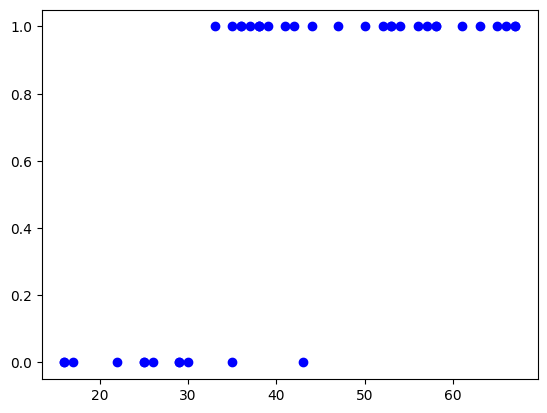

In [ ]:
plt.scatter(ages, labels, color = "blue")

plt.show()

APLICANDO A REGRESSÃO LINEAR E DEFININDO O "M" E O "B" DA FUNÇÃO (Y = X * M + B) 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1,1), labels)

m = model.coef_[0]
b = model.intercept_


CRIANDO UM LIMIAR DE IDADE PARA DEFINIR OS SEGUROS E PLOTANDO O GRÁFICO

33.56240438551759


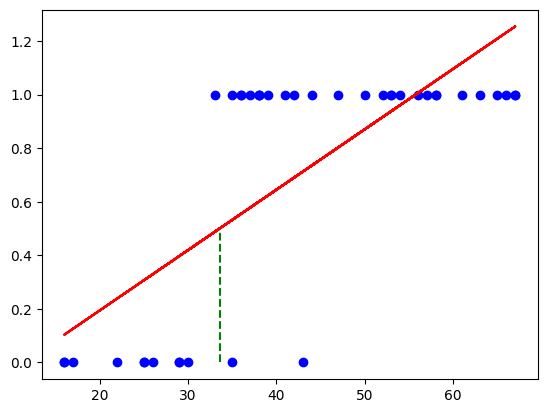

In [ ]:
limiar_idade = (0.5 - b) / m

plt.plot(ages, ages * m + b, color = "red")
plt.plot([limiar_idade, limiar_idade], [0 , 0.5], "--", color = "green" )
plt.scatter(ages, labels, color = "blue")


print(limiar_idade)
plt.show()

FUNÇÃO LOGÍSTICA/ SIGMOID

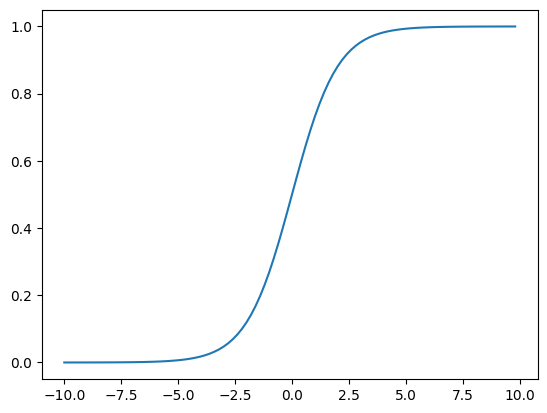

In [ ]:
import math

def sigmoid (x):
  a = []
  for item in x:
      a.append(1/(1 + math.exp(-item)))
  return a

x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

CLASSIFICADOR SIGMOID

33.331480587172706


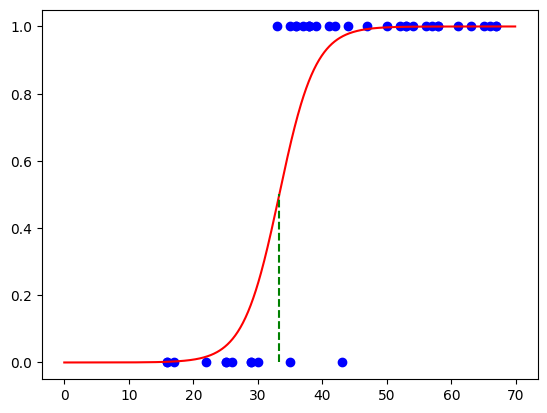

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

m = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(m * x + b)

limiar_idade = abs(b / m)

plt.plot(x, sig, color = "red")
plt.plot([limiar_idade, limiar_idade], [0 , 0.5], "--", color = "green" )
plt.scatter(ages, labels, color = "blue")
print(limiar_idade)
plt.show()